In [28]:
library(tidyverse)
library(ComplexHeatmap)
library(circlize)

In [29]:
df = read_csv("/home/fer/Documents/cfDNA/Tumor/MutationalSignatures.csv", col_types = cols(.default = "c"))
#borrar filas vacias
df <- df[rowSums(is.na(df)) != ncol(df),]
head(df)

New names:
• `` -> `...1`


...1,UEB-0212,UEB-0209,UEB-0232,UEB-0211,UEB-0230,UEB-0227,UEB-0228,UEB-0210,UEB-0215,⋯,UEB-0243,UEB-0213,UEB-0229,UEB-0242,UEB-0233,UEB-0223,UEB-0216,UEB-0238,UEB-0219,UEB-0237
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,Unknown,Luminal A,Luminal B Like HER2+,Luminal A,Luminal B Like HER2+,Luminal A,Luminal A,Luminal B Like HER2+,Luminal A,⋯,Luminal A,Luminal A,Luminal A,Luminal B Like HER2+,Luminal B,Luminal A,Luminal A,HER2+,Luminal A,Luminal A
NA,RTx-CTx,Sx,Sx,RTx-CTx,RTx-CTx,RTx,Sx,RTx-CTx,Sx,⋯,RTx-CTx,RTx-CTx,RTx-CTx,RTx-CTx,RTx-CTx,RTx,RTx-CTx,RTx-CTx,RTx,RTx-CTx
NA,Treated Tumor,Primary tratment-naive tumor,Unknown,Treated Tumor,Treated Tumor,Treated Tumor,Unknown,Treated Tumor,Treated Tumor,⋯,Treated Tumor,Treated Tumor,Primary tratment-naive tumor,Primary tratment-naive tumor,Treated Tumor,Treated Tumor,Treated Tumor,Treated Tumor,Treated Tumor,Treated Tumor
NA,I,II,III,III,III,III,Unknown,II,III,⋯,II,II,II,III,III,II,I,II,III,II
Signature.1,0.15,0.19,0.16,0.16,0.07,0,0.1,0,0.16,⋯,0.08,0.18,0.17,0.2,0.15,0.54,0.32,0.3,0.28,0.34
Signature.4,0.08,0.09,0.11,0.06,0,0,0,0.25,0.15,⋯,0,0.15,0,0,0,0,0.07,0,0,0


In [30]:
columns  = colnames(df)
columns = columns[-1]

rows = df$...1
rows = rows[-c(1:4)]

typ = as.list(df[1,])
typ = typ[-c(1)]
typ = as.character(typ)

treatment = as.list(df[2,])
treatment = treatment[-c(1)]
treatment = as.character(treatment)

tumortype =  as.list(df[3,])
tumortype = tumortype[-c(1)]
tumortype = as.character(tumortype)

stage = as.list(df[4,])
stage = stage[-c(1)]
stage = as.character(stage)

In [31]:
col_unk = "#DCDFE7"

In [32]:
mat <- df
mat=as.matrix(mat)
rownames(mat) = mat[, 1]
#colnames(mat) = mat[1, ]

mat = mat[-c(1:4),-1]
mat

,UEB-0212,UEB-0209,UEB-0232,UEB-0211,UEB-0230,UEB-0227,UEB-0228,UEB-0210,UEB-0215,UEB-0241,⋯,UEB-0243,UEB-0213,UEB-0229,UEB-0242,UEB-0233,UEB-0223,UEB-0216,UEB-0238,UEB-0219,UEB-0237
Signature.1,0.15,0.19,0.16,0.16,0.07,0,0.1,0,0.16,0.08,⋯,0.08,0.18,0.17,0.2,0.15,0.54,0.32,0.3,0.28,0.34
Signature.4,0.08,0.09,0.11,0.06,0,0,0,0.25,0.15,0,⋯,0,0.15,0,0,0,0,0.07,0,0,0
Signature.5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Signature.6,0,0.14,0.19,0.13,0.18,0.28,0.29,0.19,0.35,0.3,⋯,0.24,0.26,0.31,0.28,0.25,0.16,0.14,0.21,0.23,0.21
Signature.8,0,0,0,0,0,0.08,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Signature.10,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0.06,0,0,0,0
Signature.12,0.12,0.09,0.1,0.16,0.23,0.15,0.27,0,0,0.12,⋯,0.24,0.16,0.12,0.19,0.12,0,0.15,0.17,0.11,0.14
Signature.15,0.19,0,0,0,0,0,0,0.07,0,0.09,⋯,0.13,0.09,0.17,0.11,0.12,0.13,0.14,0,0,0
Signature.18,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Signature.20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0.07


In [33]:
mat <- matrix(as.numeric(mat),    # Convert to numeric matrix
                  ncol = ncol(mat))
rownames(mat) = rows
colnames(mat) = columns
mat

,UEB-0212,UEB-0209,UEB-0232,UEB-0211,UEB-0230,UEB-0227,UEB-0228,UEB-0210,UEB-0215,UEB-0241,⋯,UEB-0243,UEB-0213,UEB-0229,UEB-0242,UEB-0233,UEB-0223,UEB-0216,UEB-0238,UEB-0219,UEB-0237
Signature.1,0.15,0.19,0.16,0.16,0.07,0.00,0.10,0.00,0.16,0.08,⋯,0.08,0.18,0.17,0.20,0.15,0.54,0.32,0.30,0.28,0.34
Signature.4,0.08,0.09,0.11,0.06,0.00,0.00,0.00,0.25,0.15,0.00,⋯,0.00,0.15,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00
Signature.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Signature.6,0.00,0.14,0.19,0.13,0.18,0.28,0.29,0.19,0.35,0.30,⋯,0.24,0.26,0.31,0.28,0.25,0.16,0.14,0.21,0.23,0.21
Signature.8,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Signature.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00
Signature.12,0.12,0.09,0.10,0.16,0.23,0.15,0.27,0.00,0.00,0.12,⋯,0.24,0.16,0.12,0.19,0.12,0.00,0.15,0.17,0.11,0.14
Signature.15,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.09,⋯,0.13,0.09,0.17,0.11,0.12,0.13,0.14,0.00,0.00,0.00
Signature.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Signature.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07


In [34]:
d<-dist(t(mat), method = "euclidian")
fit <- hclust(d, method="ward.D") 

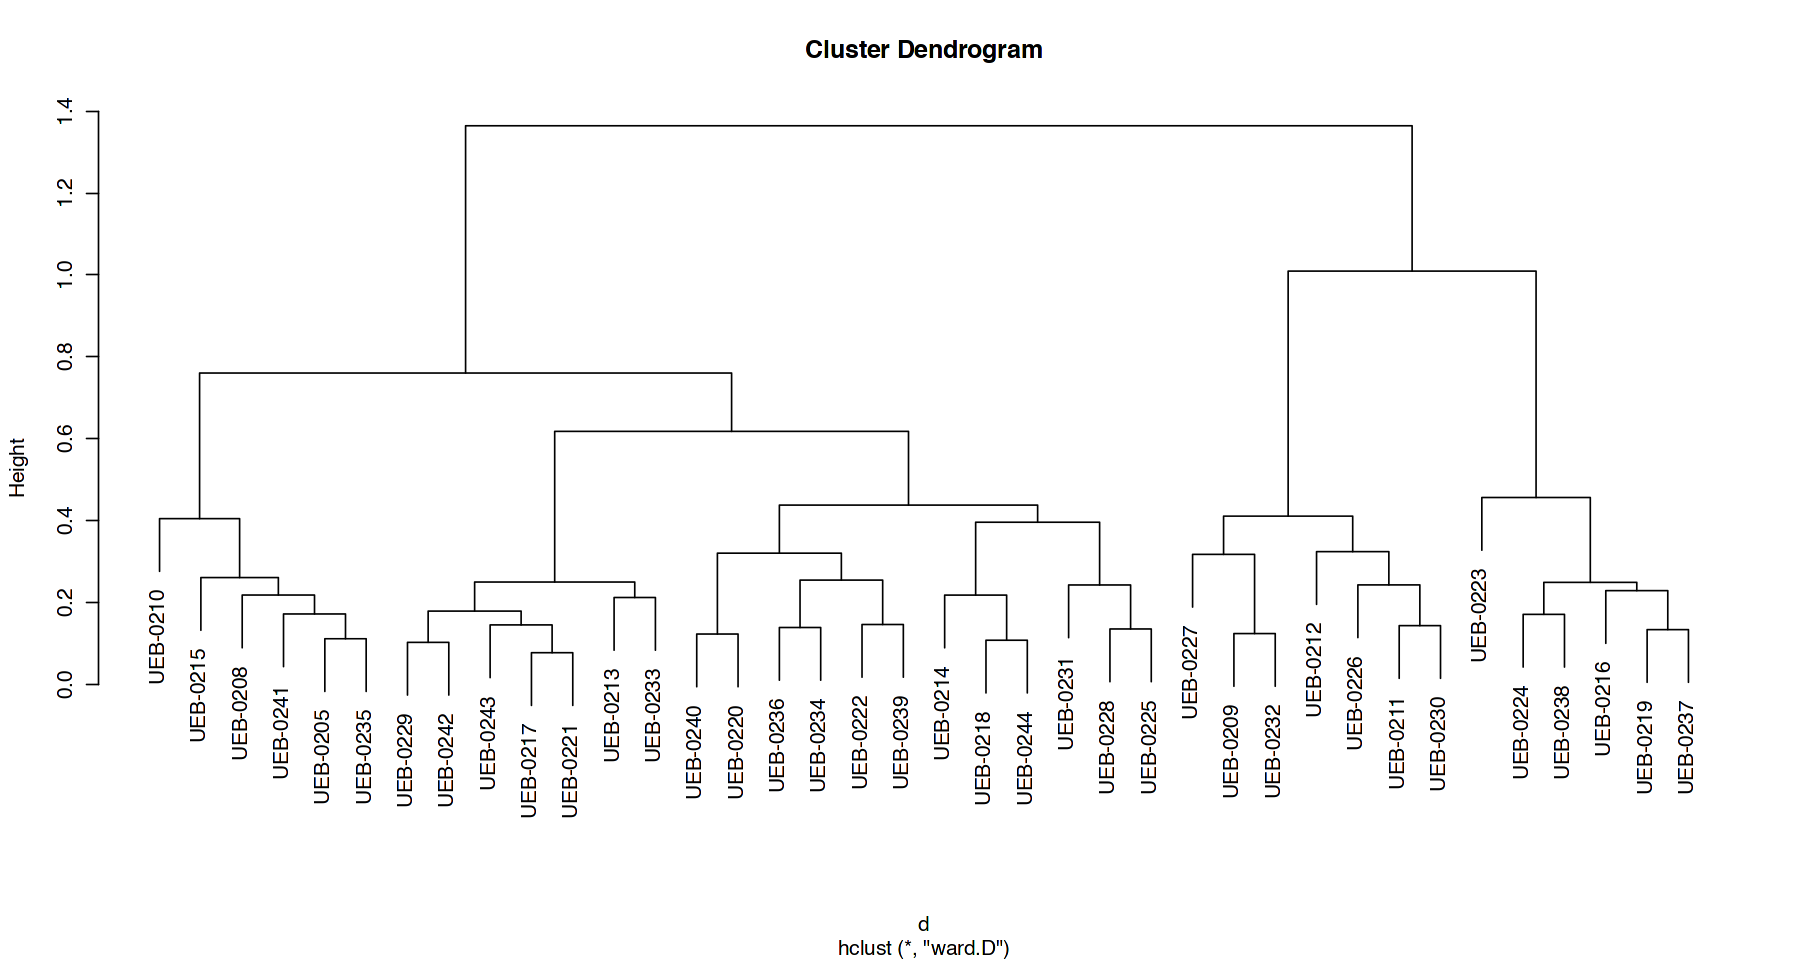

In [25]:
plot(fit) # display dendogram

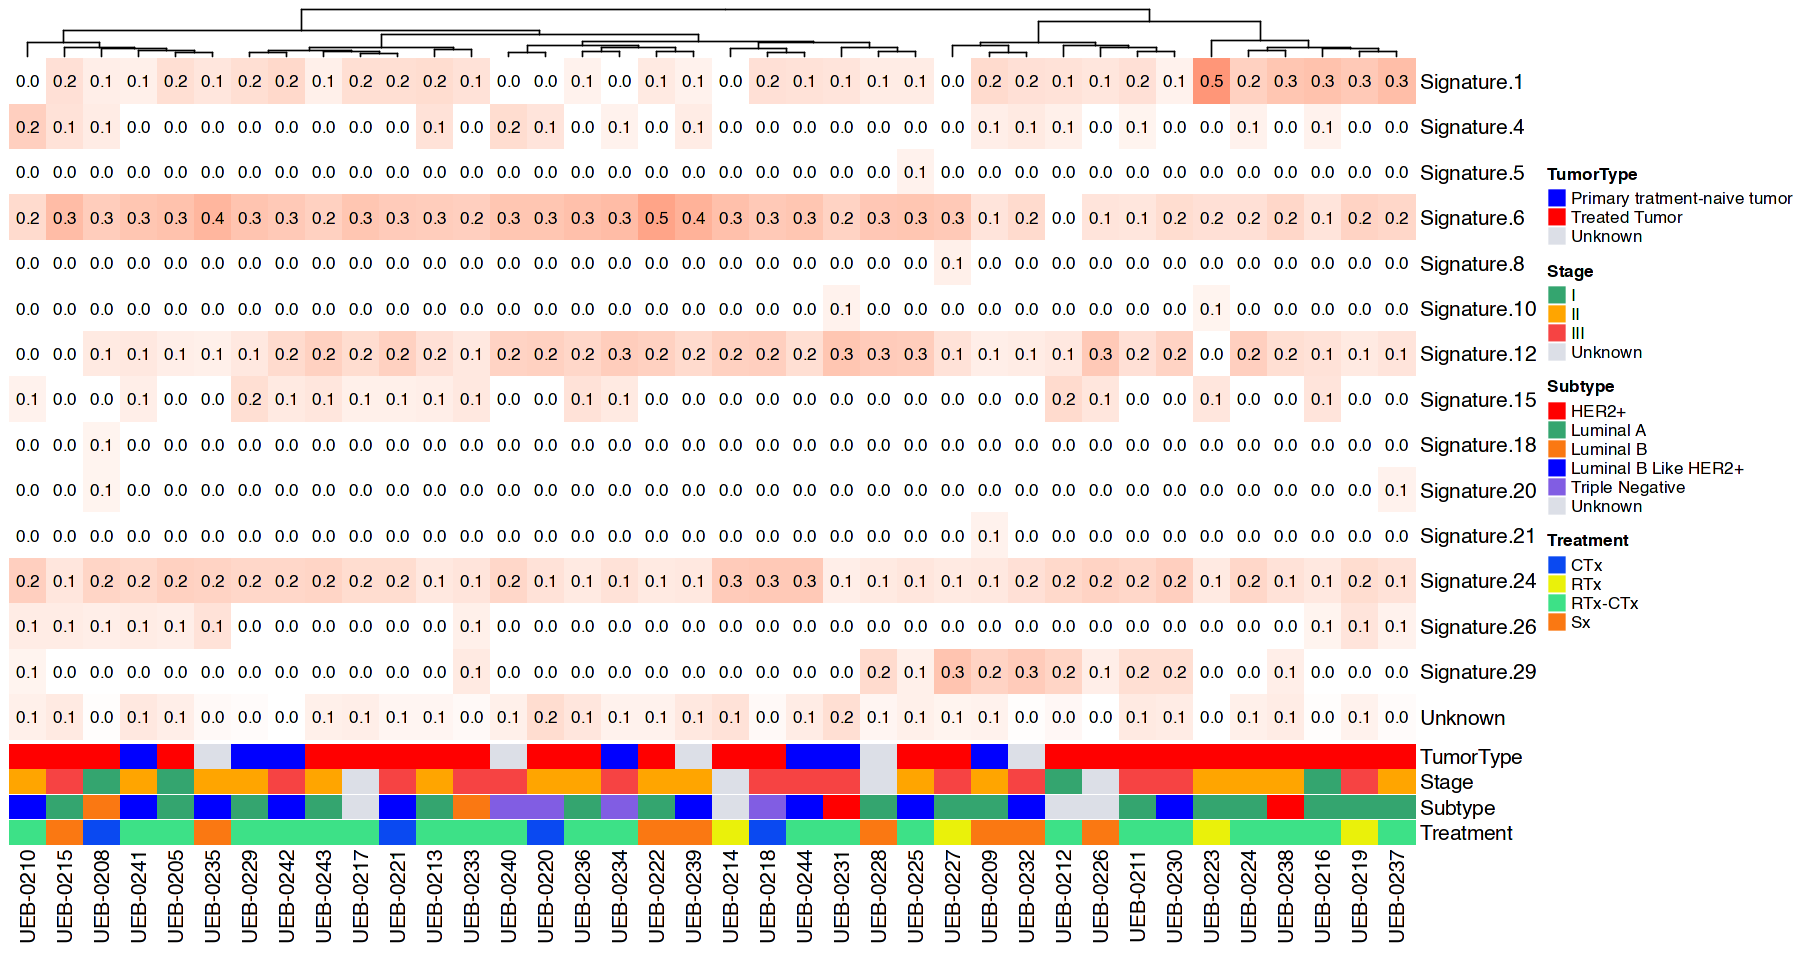

In [39]:
options(repr.plot.width = 15, repr.plot.height = 8)
#df("/home/fer/MutationalSignatures.pdf", width = 15, height = 8)

col_fun = colorRamp2(c(-2, 0, 1), c("green", "white", "red"))

Heatmap(mat, name = "mat", col = col_fun, cluster_rows = FALSE, 

         cluster_columns = fit,
        #para k-means
        #column_km = 4,
    cell_fun = function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.1f", mat[i, j]), x, y, gp = gpar(fontsize = 10))
}, show_heatmap_legend = FALSE,
       bottom_annotation = HeatmapAnnotation(TumorType = tumortype, Stage = stage,
           Subtype = typ, Treatment = treatment,
                                col = list(Subtype = c('Unknown' = col_unk,
                                                        "Luminal A" = "#34A56F",
                                                "Luminal B" = "#fa7812",
                                                 "Luminal B Like HER2+" = "blue",
                                                "HER2+" = "red",
                                                 "Triple Negative" = "#815de3"
                                                ),
                                       Treatment = c("CTx"="#0a49f1",
                                                     "RTx"="#eaf10a",
                                                     "RTx-CTx"="#3DE187",
                                                     "Sx"="#fa7812",'Unknown' = col_unk), 
                                    TumorType = c('Treated Tumor'='red', 
                                       'Primary tratment-naive tumor' = 'blue', 
                                       'Unknown'=col_unk),
                                    Stage = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                         'Unknown' = col_unk)     
                                           
                                          ), na_col = "white"
       ))
#dev.off()